# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
df = pd.read_excel('dados_ativos.xlsx')

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

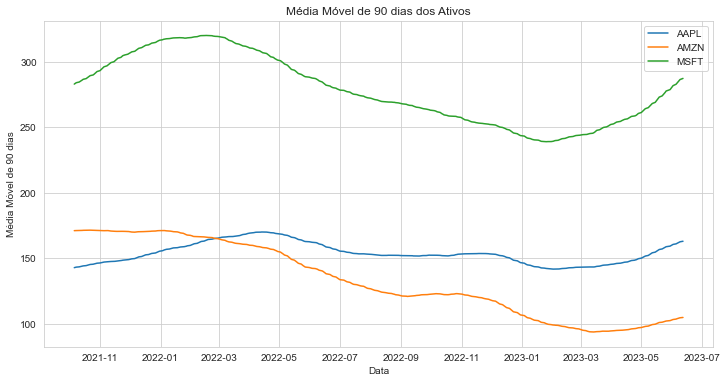

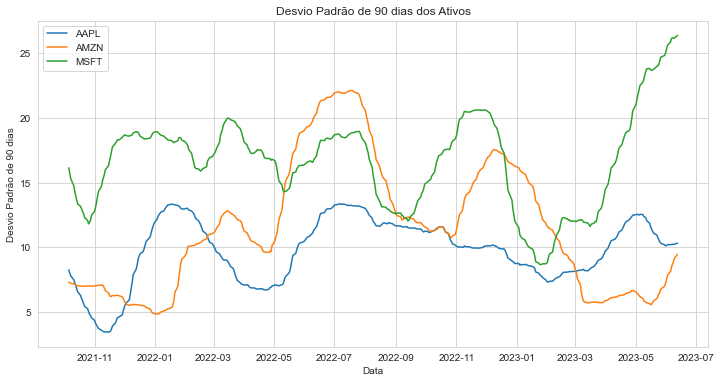

In [5]:
for ativo in ['AAPL_Close', 'AMZN_Close', 'MSFT_Close']:
    df[f'{ativo}_MA90'] = df[ativo].rolling(window=90).mean()

# Calculate the 90-day moving standard deviation for each asset
for ativo in ['AAPL_Close', 'AMZN_Close', 'MSFT_Close']:
    df[f'{ativo}_SD90'] = df[ativo].rolling(window=90).std()

# Set the style of the plots
sns.set_style('whitegrid')

# Plot the moving averages for each asset
plt.figure(figsize=(12, 6))
for ativo in ['AAPL', 'AMZN', 'MSFT']:
    sns.lineplot(data=df, x='Date', y=f'{ativo}_Close_MA90', label=ativo)

plt.xlabel('Data')
plt.ylabel('Média Móvel de 90 dias')
plt.legend()
plt.title('Média Móvel de 90 dias dos Ativos')
plt.show()

# Plot the moving standard deviations for each asset
plt.figure(figsize=(12, 6))
for ativo in ['AAPL', 'AMZN', 'MSFT']:
    sns.lineplot(data=df, x='Date', y=f'{ativo}_Close_SD90', label=ativo)

plt.xlabel('Data')
plt.ylabel('Desvio Padrão de 90 dias')
plt.legend()
plt.title('Desvio Padrão de 90 dias dos Ativos')
plt.show()

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

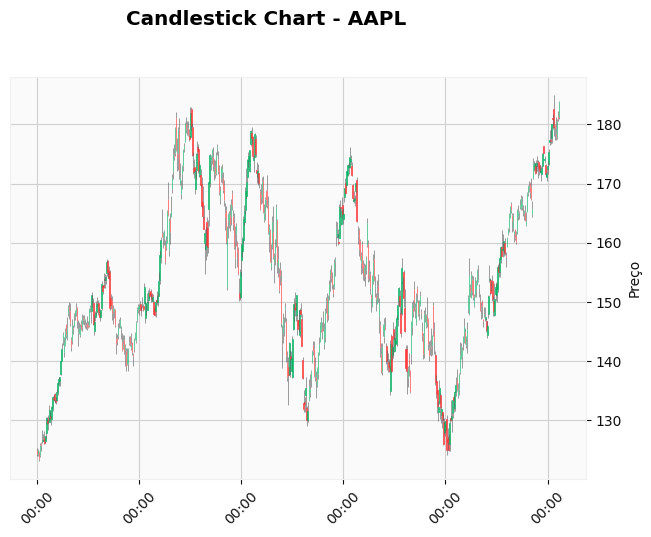

In [11]:
asset = 'AAPL'
recent_data = df.loc[-60:, [f'{asset}_Open', f'{asset}_High', f'{asset}_Low', f'{asset}_Close']]

# Rename the columns to match the expected names by mplfinance
recent_data.columns = ['Open', 'High', 'Low', 'Close']

# Convert the index to datetime
recent_data.index = pd.to_datetime(recent_data.index)

# Create the candlestick chart
mpf.plot(recent_data, type='candle', style='yahoo', title=f'Candlestick Chart - {asset}', ylabel='Preço')